In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

import keras 

import warnings

## Cargamos el dataset MNIST

In [2]:
# Cargar el dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

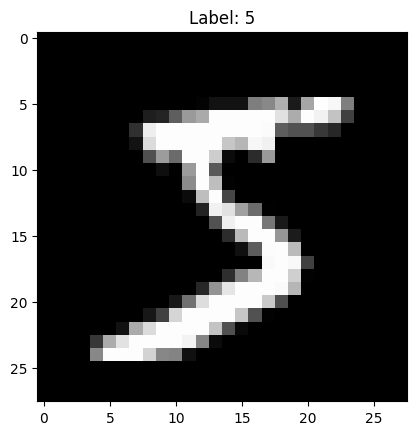

In [3]:
# Mostrar una imagen del dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

## Creamos el Modelo

In [4]:
# Nos Asegurarmos de que los datos sean arrays numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Normalizamos los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Definimos el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

C:\Users\tomif\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8465 - loss: 0.6144 - val_accuracy: 0.9602 - val_loss: 0.1404
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9561 - loss: 0.1476 - val_accuracy: 0.9708 - val_loss: 0.0976
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9697 - loss: 0.1016 - val_accuracy: 0.9757 - val_loss: 0.0823
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0709 - val_accuracy: 0.9757 - val_loss: 0.0835
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9841 - loss: 0.0545 - val_accuracy: 0.9775 - val_loss: 0.0774


## Evaluamos el Modelo

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9707 - loss: 0.0926
Test accuracy: 0.9750000238418579


## Guardamos el modelo

In [ ]:
# model.save('my_mnist_model.h5')

## Hacemos predicciones

In [7]:
 # Mostramos las probabilidades para la primera imagen en el conjunto de prueba
predictions = model.predict(x_test)
print(predictions[0]) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
[1.2632066e-07 9.6697574e-09 2.8674311e-05 1.1532321e-03 2.5504684e-10
 4.4410623e-07 1.3153832e-13 9.9880195e-01 8.9118812e-06 6.5575737e-06
 8.6581637e-13 1.7225714e-12 2.4775744e-13 4.4335991e-14 5.7082499e-14
 5.9183707e-13 3.5760327e-13 1.0803014e-13 5.0066900e-13 3.3440546e-13
 2.9965852e-13 1.7249616e-12 2.5960414e-12 1.0986671e-12 3.9003300e-13
 1.1374621e-13 4.3456257e-13 1.0791239e-12 5.0344218e-13 1.9685670e-12
 3.8049099e-13 3.8771438e-13 1.2745386e-13 9.1547570e-13 2.0921848e-13
 7.6157331e-13 2.0178068e-13 1.1595964e-12 1.2238803e-13 9.2469598e-13
 1.7281486e-13 7.0743650e-14 4.6486079e-13 7.2537451e-13 3.0357975e-12
 9.3600117e-13 3.0286019e-13 1.2524595e-13 1.0334457e-12 3.0681154e-13
 3.1979500e-13 1.4371912e-12 1.9924660e-13 2.8201578e-13 1.2442354e-13
 4.8828597e-14 3.2358686e-13 7.1127904e-14 8.5568851e-13 1.3134879e-13
 1.4475931e-12 1.3620287e-13 8.5248554e-14 4.6748288e-13 3.7753863e-13
 4.7372566e-13 8.5762642e-13 1.464

In [8]:
# obtenemos la etiqueta predicha
predicted_label = np.argmax(predictions[0])
print(f'Predicted label: {predicted_label}')

Predicted label: 7


## Visualizamos las predicciones

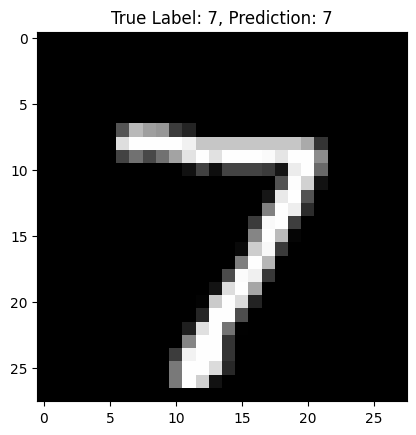

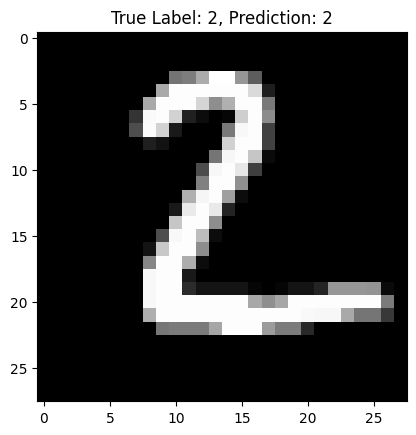

In [9]:
def plot_image(image, label, prediction):
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {label}, Prediction: {prediction}')
    plt.show()

for i in range(2):  # Muestra las primeras 2 imágenes
    plt.figure()
    plot_image(x_test[i], y_test[i], np.argmax(predictions[i]))